Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2

In [2]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [11]:
import pandas as pd       
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import cv2
import warnings
warnings.filterwarnings('ignore')

import random
import os
import glob
from numpy.random import 



seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from tensorflow.random import set_seed
set_seed(42)


In [4]:
main_path = "chest_xray_images/chest_xray/"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")
val_path=os.path.join(main_path,"val")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

val_normal = glob.glob(val_path+"/NORMAL/*.jpeg")
val_pneumonia = glob.glob(val_path+"/PNEUMONIA/*.jpeg")

In [5]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]



test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]


val_list = [x for x in val_normal]
val_list.extend([x for x in val_pneumonia])

df_val = pd.DataFrame(np.concatenate([['Normal']*len(val_normal) , ['Pneumonia']*len(val_pneumonia)]), columns = ['class'])
df_val['image'] = [x for x in val_list]

In [6]:
df_train

,class,image
0,Normal,chest_xray_images/chest_xray/train/NORMAL/NORM...
1,Normal,chest_xray_images/chest_xray/train/NORMAL/NORM...
2,Normal,chest_xray_images/chest_xray/train/NORMAL/IM-0...
3,Normal,chest_xray_images/chest_xray/train/NORMAL/NORM...
4,Normal,chest_xray_images/chest_xray/train/NORMAL/IM-0...
...,...,...
5211,Pneumonia,chest_xray_images/chest_xray/train/PNEUMONIA/p...
5212,Pneumonia,chest_xray_images/chest_xray/train/PNEUMONIA/p...
5213,Pneumonia,chest_xray_images/chest_xray/train/PNEUMONIA/p...
5214,Pneumonia,chest_xray_images/chest_xray/train/PNEUMONIA/p...


In [14]:
df_test

,class,image
0,Normal,chest_xray_images/chest_xray/test/NORMAL/IM-00...
1,Normal,chest_xray_images/chest_xray/test/NORMAL/IM-00...
2,Normal,chest_xray_images/chest_xray/test/NORMAL/NORMA...
3,Normal,chest_xray_images/chest_xray/test/NORMAL/NORMA...
4,Normal,chest_xray_images/chest_xray/test/NORMAL/NORMA...
...,...,...
619,Pneumonia,chest_xray_images/chest_xray/test/PNEUMONIA/pe...
620,Pneumonia,chest_xray_images/chest_xray/test/PNEUMONIA/pe...
621,Pneumonia,chest_xray_images/chest_xray/test/PNEUMONIA/pe...
622,Pneumonia,chest_xray_images/chest_xray/test/PNEUMONIA/pe...


In [15]:
df_val

,class,image
0,Normal,chest_xray_images/chest_xray/val/NORMAL/NORMAL...
1,Normal,chest_xray_images/chest_xray/val/NORMAL/NORMAL...
2,Normal,chest_xray_images/chest_xray/val/NORMAL/NORMAL...
3,Normal,chest_xray_images/chest_xray/val/NORMAL/NORMAL...
4,Normal,chest_xray_images/chest_xray/val/NORMAL/NORMAL...
5,Normal,chest_xray_images/chest_xray/val/NORMAL/NORMAL...
6,Normal,chest_xray_images/chest_xray/val/NORMAL/NORMAL...
7,Normal,chest_xray_images/chest_xray/val/NORMAL/NORMAL...
8,Pneumonia,chest_xray_images/chest_xray/val/PNEUMONIA/per...
9,Pneumonia,chest_xray_images/chest_xray/val/PNEUMONIA/per...


# EDA

<AxesSubplot:title={'center':'Number of cases for each class in Val Data Set'}, xlabel='class', ylabel='number of cases'>

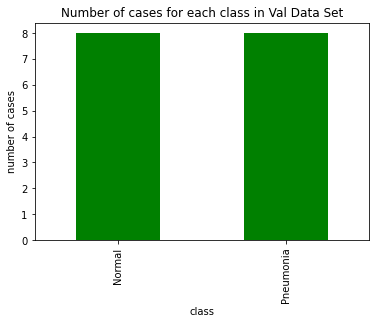

In [25]:
df_val['class'].value_counts().plot(kind='bar', xlabel='class', ylabel='number of cases', title='Number of cases for each class in Val Data Set', color='green')

<AxesSubplot:title={'center':'Number of cases for each class in Train Data Set'}, xlabel='class', ylabel='number of cases'>

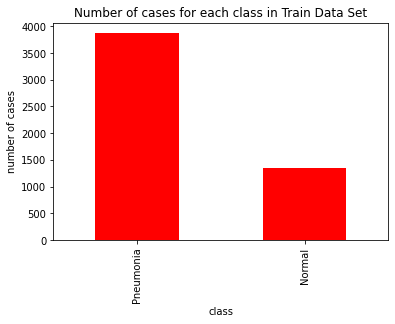

In [7]:
df_train['class'].value_counts().plot(kind='bar', xlabel='class', ylabel='number of cases', title='Number of cases for each class in Train Data Set', color='red')

<AxesSubplot:title={'center':'Number of cases for each class in Test Data Set'}, xlabel='class', ylabel='number of cases'>

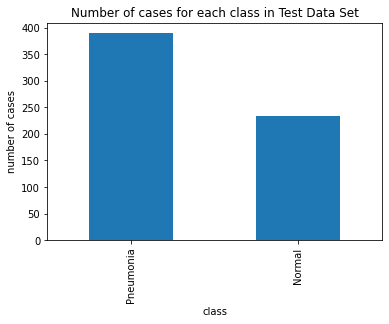

In [8]:
df_test['class'].value_counts().plot(kind='bar', xlabel='class', ylabel='number of cases', title='Number of cases for each class in Test Data Set')

## Preview the Image

In [12]:
def plotFirstThreeImage(dataSet):
    plt.figure(figsize=(12,12))
    for i in range (0, 3):
        plt.subplot(3, 4, i+1)
        img = cv2.imread(dataSet[i])
        img = cv2.resize(img, (244, 244))
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show
    

plotFirstThreeImage(train_normal)

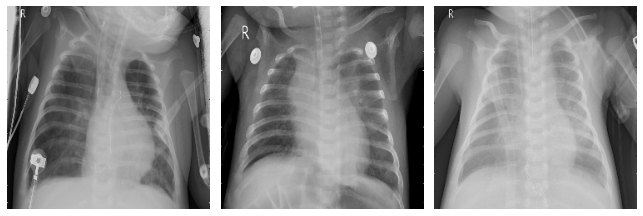

In [14]:
plotFirstThreeImage(train_pneumonia)

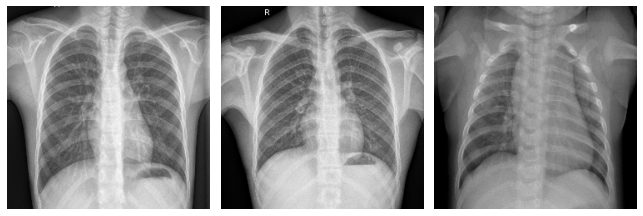

In [58]:
plotFirstThreeImage(test_normal)

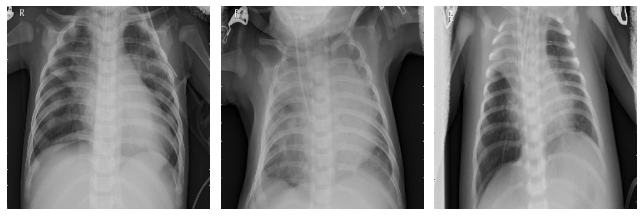

In [59]:
plotFirstThreeImage(test_pneumonia)